In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress


In [3]:
car_data = pd.read_csv('mpg.csv')
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# examine data
car_data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       94
weight          351
acceleration     95
model year       13
origin            3
car name        305
dtype: int64

In [5]:
# remove rows missing horsepower values
car_data = car_data.loc[car_data['horsepower'] != "?"]
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
# check changed data
car_data.nunique()

mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

In [7]:
# examine data types
car_data.info()
car_data.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    object 
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 30.6+ KB


mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

In [8]:
# convert horsepower to numeric
car_data['horsepower'] = pd.to_numeric(car_data['horsepower'])

In [9]:
# convert weight to numeric
car_data['weight'] = pd.to_numeric(car_data['weight'])

In [10]:
car_data.info()
car_data.nunique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


mpg             127
cylinders         5
displacement     81
horsepower       93
weight          346
acceleration     95
model year       13
origin            3
car name        301
dtype: int64

In [11]:
car_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [12]:
# set car name as index and remove origin column
car_data = car_data.set_index('car name')
del car_data['origin']
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
car name,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70
buick skylark 320,15.0,8,350.0,165,3693,11.5,70
plymouth satellite,18.0,8,318.0,150,3436,11.0,70
amc rebel sst,16.0,8,304.0,150,3433,12.0,70
ford torino,17.0,8,302.0,140,3449,10.5,70


<IPython.core.display.Javascript object>


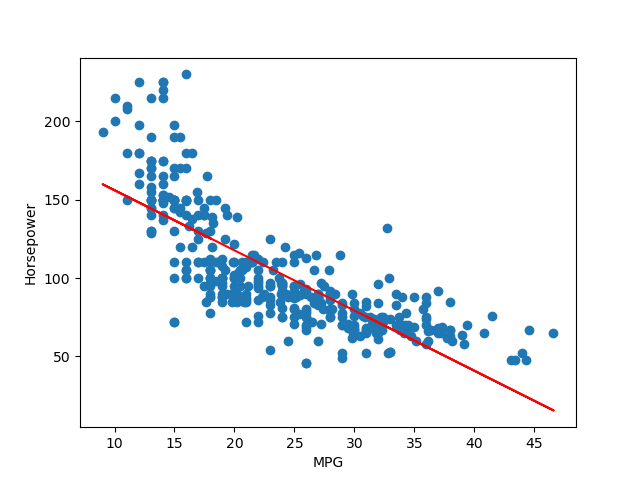

R squared: 0.6059482578894345
The correlation between both factors is -0.78


In [13]:
x_values = car_data['mpg'].astype('float')
y_values = car_data['horsepower'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('MPG')
plt.ylabel('Horsepower')

# Print r square value
print(f"R squared: {rvalue**2}")

correlation = sts.pearsonr(y_values, x_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Show plot
plt.show()

<IPython.core.display.Javascript object>


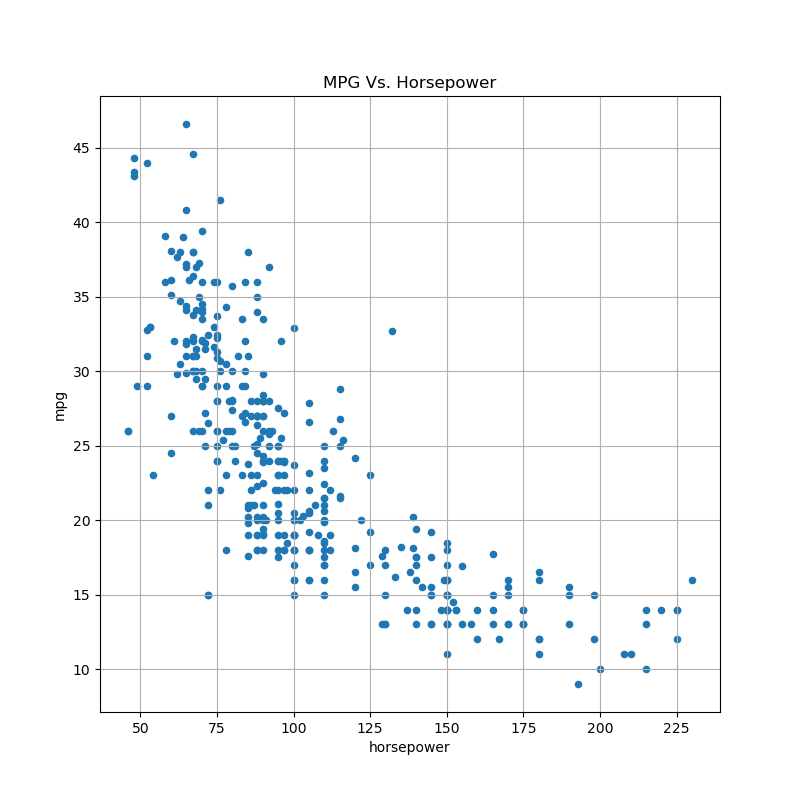

The correlation between both factors is -0.78


In [14]:
# scatter plot comparing horsepower and mpg
car_data.plot(kind="scatter", x="horsepower", y="mpg", grid=True, figsize=(8,8),
              title="MPG Vs. Horsepower")
horsepower = car_data.iloc[:,3]
mpg = car_data.iloc[:,0]
correlation = sts.pearsonr(horsepower, mpg)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('mpgvshorsepower.png')
plt.show()


<IPython.core.display.Javascript object>


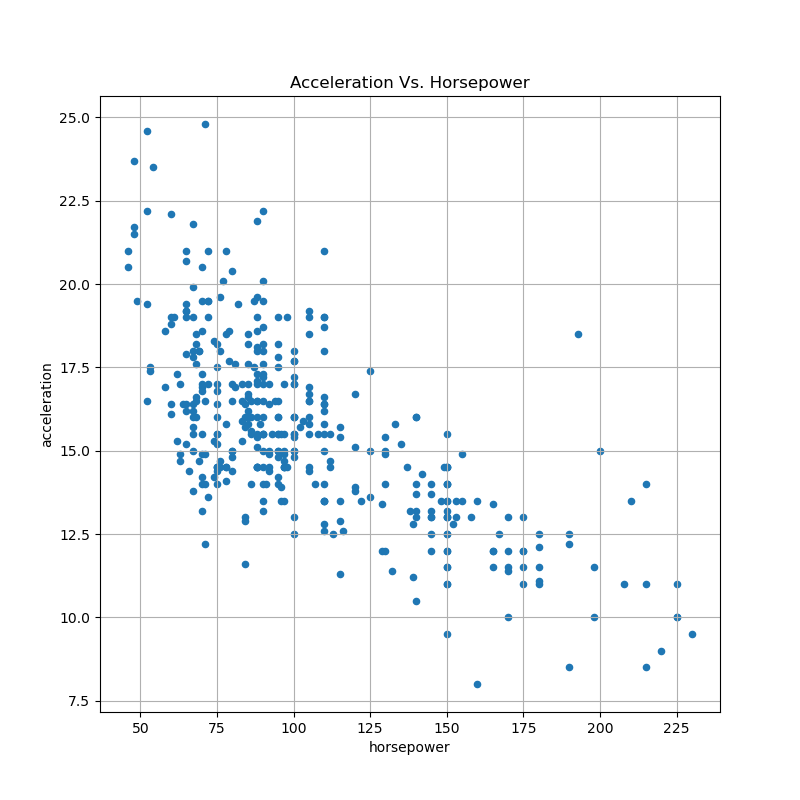

The correlation between both factors is -0.69


In [15]:
# scatter plot comparing horsepower and acceleration
car_data.plot(kind="scatter", x="horsepower", y="acceleration", grid=True, figsize=(8,8),
              title="Acceleration Vs. Horsepower")
horsepower = car_data.iloc[:,3]
acceleration = car_data.iloc[:,5]
correlation = sts.pearsonr(horsepower, acceleration)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.savefig('accelerationvshorsepower.png')
plt.show()


In [16]:
# scatter plot comparing horsepower and weight
car_data.plot(kind="scatter", x="horsepower", y="weight", grid=True, figsize=(8,8),
              title="Weight Vs. Horsepower")
horsepower = car_data.iloc[:,3]
weight = car_data.iloc[:,4]
correlation = sts.pearsonr(horsepower, weight)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()


<IPython.core.display.Javascript object>

The correlation between both factors is 0.86


In [17]:
# scatter plot comparing mpg and acceleration
car_data.plot(kind="scatter", x="mpg", y="acceleration", grid=True, figsize=(8,8),
              title="Acceleration Vs. MPG")
mpg = car_data.iloc[:,0]
acceleration = car_data.iloc[:,5]
correlation = sts.pearsonr(mpg, acceleration)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()


<IPython.core.display.Javascript object>

The correlation between both factors is 0.42


In [18]:
# scatter plot comparing weight and acceleration
car_data.plot(kind="scatter", x="weight", y="acceleration", grid=True, figsize=(8,8),
              title="Acceleration Vs. Weight")
weight = car_data.iloc[:,4]
acceleration = car_data.iloc[:,5]
correlation = sts.pearsonr(weight,acceleration)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()


<IPython.core.display.Javascript object>

The correlation between both factors is -0.42


In [19]:
car_data = car_data.sort_values(by='horsepower', ascending=False)
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
car name,,,,,,,
pontiac grand prix,16.0,8,400.0,230,4278,9.5,73
buick electra 225 custom,12.0,8,455.0,225,4951,11.0,73
buick estate wagon (sw),14.0,8,455.0,225,3086,10.0,70
pontiac catalina,14.0,8,455.0,225,4425,10.0,70
chevrolet impala,14.0,8,454.0,220,4354,9.0,70


In [20]:
html_table = car_data.to_html()
html_table.replace('\n', '')

'<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>mpg</th>      <th>cylinders</th>      <th>displacement</th>      <th>horsepower</th>      <th>weight</th>      <th>acceleration</th>      <th>model year</th>    </tr>    <tr>      <th>car name</th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>      <th></th>    </tr>  </thead>  <tbody>    <tr>      <th>pontiac grand prix</th>      <td>16.0</td>      <td>8</td>      <td>400.0</td>      <td>230</td>      <td>4278</td>      <td>9.5</td>      <td>73</td>    </tr>    <tr>      <th>buick electra 225 custom</th>      <td>12.0</td>      <td>8</td>      <td>455.0</td>      <td>225</td>      <td>4951</td>      <td>11.0</td>      <td>73</td>    </tr>    <tr>      <th>buick estate wagon (sw)</th>      <td>14.0</td>      <td>8</td>      <td>455.0</td>      <td>225</td>      <td>3086</td>      <td>10.0</td>      <td>70</td>    </tr>    <tr>      <th>po

In [21]:
car_data.to_html('table.html')